## Observations and Insights 

* My first observation is that Capomulin and Ramicane had the most mice at each timepoint throughout the study, which I would interpret as the highest survival rate. To coincide with this, they also had the lowest average tumor volume of all the Drug Regimens.

* The average tumor volume for both Ramicane and Infubinol was fairly centered in the interquartile range while Infubinol has an outlier, albeit not a strong one being it's just outside the range. 

* The tumor in mouse l509 on Capomulin had a very sharp decrease in volume after the 20th day of treatment with a slight increase in volume between days 35 and 45. 

* The correlation between mouse weight and average tumor volume for mice on Capomulin is very strong with a correlation coefficient of 0.84.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

In [2]:
# Checking the number of mice in the DataFrame.
combined_data.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Resource: https://stackoverflow.com/questions/44906754/unique-values-of-two-columns-for-pandas-dataframe?rq=1
df = combined_data.groupby(['Mouse ID', 'Timepoint']).size().reset_index(name='Freq')
temp_df = pd.DataFrame(df)
temp_df = df.loc[temp_df["Freq"]>1]
temp_df.head(20)

,Mouse ID,Timepoint,Freq
586,g989,0,2
587,g989,5,2
588,g989,10,2
589,g989,15,2
590,g989,20,2


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_mouse = combined_data.loc[combined_data["Mouse ID"] == "g989", :]
dupe_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_data.drop_duplicates(subset=["Mouse ID","Timepoint"], inplace=True)

In [6]:
# Checking the number of mice in the clean DataFrame.
combined_data.count()

Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
regimen_group = combined_data.groupby('Drug Regimen')

r_mean = regimen_group["Tumor Volume (mm3)"].mean()
r_med = regimen_group["Tumor Volume (mm3)"].median()
var_calc = combined_data.groupby('Drug Regimen').var()
r_var = var_calc["Tumor Volume (mm3)"]
std_calc = combined_data.groupby('Drug Regimen').std()
r_std = std_calc["Tumor Volume (mm3)"] 
sems = combined_data.groupby('Drug Regimen').sem()
r_sems = sems["Tumor Volume (mm3)"] 

summary_df = pd.merge(r_mean, r_med, on="Drug Regimen")
summary_df = summary_df.rename(columns={"Tumor Volume (mm3)_x":"Tumor Volume Mean", 
                                        "Tumor Volume (mm3)_y":"Tumor Volume Median"})
summary_df = pd.merge(summary_df, r_var, on="Drug Regimen")
summary_df = summary_df.rename(columns={"Tumor Volume (mm3)":"Tumor Volume Variance"})
summary_df = pd.merge(summary_df, r_std, on="Drug Regimen")
summary_df = summary_df.rename(columns={"Tumor Volume (mm3)":"Tumor Volume Std Deviation"})
summary_df = pd.merge(summary_df, r_sems, on="Drug Regimen")
summary_df = summary_df.rename(columns={"Tumor Volume (mm3)":"Tumor Volume SEM"})

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

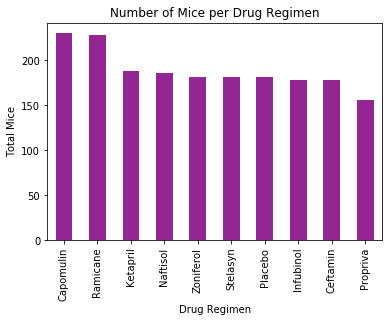

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 
regimen_groups = combined_data.groupby(["Drug Regimen"])
tps = regimen_groups["Timepoint"].count()
tps.sort_values(inplace=True, ascending=False)
mouse_tps_chart = tps.plot(kind='bar', title="Number of Mice per Drug Regimen", alpha=.85, color="purple")
mouse_tps_chart.set_xlabel("Drug Regimen")
mouse_tps_chart.set_ylabel("Total Mice")
plt.show()

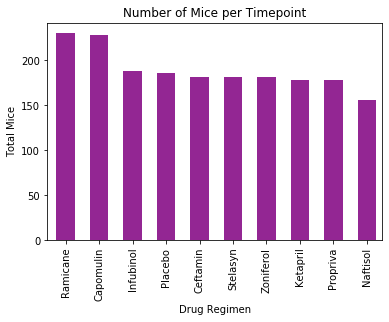

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
x_axis = combined_data["Drug Regimen"].unique()

tps = regimen_groups["Timepoint"].count()
tps.sort_values(inplace=True, ascending=False)
plt.bar(x_axis, tps, color="purple", align="center", alpha=.85, width=.55)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, rotation=90)
plt.title("Number of Mice per Timepoint")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Mice")
plt.xlim(-.55,9.45)
plt.show()

## Pie Plots

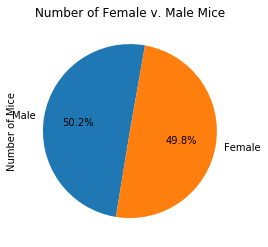

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice = mouse_metadata["Sex"].value_counts()
gender_list = mice.keys()

mouse_gender_pie = mice.plot(kind='pie', y=gender_list, title="Number of Female v. Male Mice", autopct="%1.1f%%", startangle=80)
mouse_gender_pie.set_ylabel("Number of Mice")
plt.show()

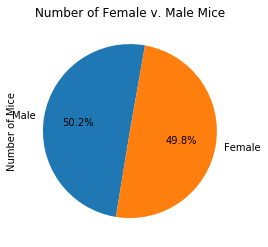

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice = mouse_metadata["Sex"].value_counts()
gender_list = mice.keys()

plt.pie(mice, labels=gender_list, autopct="%1.1f%%", startangle=80)
plt.title("Number of Female v. Male Mice")
plt.ylabel("Number of Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
combined_data.sort_values(by=['Mouse ID','Timepoint'])
combined_data.drop_duplicates(subset='Mouse ID', keep='last', inplace=True)

capomulin_df = combined_data.loc[(combined_data["Drug Regimen"] == "Capomulin"), ["Drug Regimen","Tumor Volume (mm3)"]]
ramicane_df = combined_data.loc[(combined_data["Drug Regimen"] == "Ramicane"), ["Drug Regimen","Tumor Volume (mm3)"]]
infubinol_df = combined_data.loc[(combined_data["Drug Regimen"] == "Infubinol"), ["Drug Regimen","Tumor Volume (mm3)"]]
ceftamin_df = combined_data.loc[(combined_data["Drug Regimen"] == "Ceftamin"), ["Drug Regimen","Tumor Volume (mm3)"]]

In [14]:
#Calculate capomulin
ca_quartiles = capomulin_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
ca_lowerq = ca_quartiles[.25]
ca_upperq = ca_quartiles[.75]
ca_iqr = ca_upperq-ca_lowerq
ca_lower_bound = ca_lowerq - (1.5*ca_iqr)
ca_upper_bound = ca_upperq + (1.5*ca_iqr)
print(f"-----------------CAPOMULIN RESULTS-----------------")
print(f"The lower quartile of temperatures is: {round(ca_lowerq,6)}.")
print(f"The upper quartile of temperatures is: {round(ca_upperq,6)}.")
print(f"The interquartile range of tumor volumes is: {round(ca_iqr,6)}.")
print(f"Values below {round(ca_lower_bound,6)} could be outliers.")
print(f"Values above {round(ca_upper_bound,6)} could be outliers.")
ca_outliers = capomulin_df.loc[(capomulin_df["Tumor Volume (mm3)"]>ca_upper_bound)|(capomulin_df["Tumor Volume (mm3)"]<ca_lower_bound),:]
#print(f"The following are outlier values: {ca_outliers}.")
print(f"There are no outliers.")
print(f"----------------------------------------------------")

-----------------CAPOMULIN RESULTS-----------------
The lower quartile of temperatures is: 32.377357.
The upper quartile of temperatures is: 40.15922.
The interquartile range of tumor volumes is: 7.781863.
Values below 20.704562 could be outliers.
Values above 51.832015 could be outliers.
There are no outliers.
----------------------------------------------------


In [15]:
#ramicane
ra_quartiles = ramicane_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
ra_lowerq = ra_quartiles[.25]
ra_upperq = ra_quartiles[.75]
ra_iqr = ra_upperq-ra_lowerq
ra_lower_bound = ra_lowerq - (1.5*ra_iqr)
ra_upper_bound = ra_upperq + (1.5*ra_iqr)
print(f"------------------RAMICANE RESULTS------------------")
print(f"The lower quartile of temperatures is: {round(ra_lowerq,6)}.")
print(f"The upper quartile of temperatures is: {round(ra_upperq,6)}.")
print(f"The interquartile range of tumor volumes is: {round(ra_iqr,6)}.")
print(f"Values below {round(ra_lower_bound,6)} could be outliers.")
print(f"Values above {round(ra_upper_bound,6)} could be outliers.")
ra_outliers = ramicane_df.loc[(ramicane_df["Tumor Volume (mm3)"]>ra_upper_bound)|(ramicane_df["Tumor Volume (mm3)"]<ra_lower_bound),:]
#print(f"The following are outlier values: {ra_outliers}.")
print(f"There are no outliers.")
print(f"----------------------------------------------------")

------------------RAMICANE RESULTS------------------
The lower quartile of temperatures is: 31.56047.
The upper quartile of temperatures is: 40.659006.
The interquartile range of tumor volumes is: 9.098537.
Values below 17.912664 could be outliers.
Values above 54.306811 could be outliers.
There are no outliers.
----------------------------------------------------


In [16]:
#infubinol
in_quartiles = infubinol_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
in_lowerq = in_quartiles[.25]
in_upperq = in_quartiles[.75]
in_iqr = in_upperq-in_lowerq
in_lower_bound = in_lowerq - (1.5*in_iqr)
in_upper_bound = in_upperq + (1.5*in_iqr)
print(f"------------------INFUBINOL RESULTS------------------")
print(f"The lower quartile of temperatures is: {round(in_lowerq,6)}.")
print(f"The upper quartile of temperatures is: {round(in_upperq,6)}.")
print(f"The interquartile range of tumor volumes is: {round(in_iqr,6)}.")
print(f"Values below {round(in_lower_bound,6)} could be outliers.")
print(f"Values above {round(in_upper_bound,6)} could be outliers.")
in_outliers = infubinol_df.loc[(infubinol_df["Tumor Volume (mm3)"]>in_upper_bound)|(infubinol_df["Tumor Volume (mm3)"]<in_lower_bound),"Tumor Volume (mm3)"]
print(f"The following are outlier values: {round(float(in_outliers),6)}.")
#print(f"There are no outliers.")
print(f"----------------------------------------------------")

------------------INFUBINOL RESULTS------------------
The lower quartile of temperatures is: 54.048608.
The upper quartile of temperatures is: 65.525743.
The interquartile range of tumor volumes is: 11.477135.
Values below 36.832905 could be outliers.
Values above 82.741446 could be outliers.
The following are outlier values: 36.321346.
----------------------------------------------------


In [17]:
#ceftamin
ce_quartiles = ceftamin_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
ce_lowerq = ce_quartiles[.25]
ce_upperq = ce_quartiles[.75]
ce_iqr = ce_upperq-ce_lowerq
ce_lower_bound = ce_lowerq - (1.5*ce_iqr)
ce_upper_bound = ce_upperq + (1.5*ce_iqr)
print(f"------------------CEFTAMIN RESULTS------------------")
print(f"The lower quartile of temperatures is: {round(ce_lowerq,6)}.")
print(f"The upper quartile of temperatures is: {round(ce_upperq,6)}.")
print(f"The interquartile range of tumor volumes is: {round(ce_iqr,6)}.")
print(f"Values below {round(ce_lower_bound,6)} could be outliers.")
print(f"Values above {round(ce_upper_bound,6)} could be outliers.")
ce_outliers = ceftamin_df.loc[(ceftamin_df["Tumor Volume (mm3)"]>ce_upper_bound)|(ceftamin_df["Tumor Volume (mm3)"]<ce_lower_bound),"Tumor Volume (mm3)"]
#print(f"The following are outlier values: {round(float(ce_outliers),6)}.")
print(f"There are no outliers.")
print(f"----------------------------------------------------")

------------------CEFTAMIN RESULTS------------------
The lower quartile of temperatures is: 48.722078.
The upper quartile of temperatures is: 64.29983.
The interquartile range of tumor volumes is: 15.577752.
Values below 25.35545 could be outliers.
Values above 87.666458 could be outliers.
There are no outliers.
----------------------------------------------------


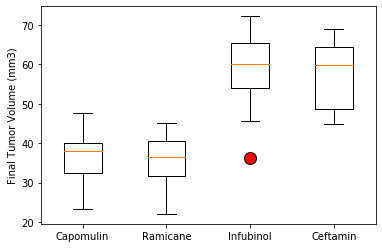

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
capomulin_df = combined_data.loc[(combined_data["Drug Regimen"] == "Capomulin"), "Tumor Volume (mm3)"]
ramicane_df = combined_data.loc[(combined_data["Drug Regimen"] == "Ramicane"), "Tumor Volume (mm3)"]
infubinol_df = combined_data.loc[(combined_data["Drug Regimen"] == "Infubinol"), "Tumor Volume (mm3)"]
ceftamin_df = combined_data.loc[(combined_data["Drug Regimen"] == "Ceftamin"), "Tumor Volume (mm3)"]
dr_dfs=[capomulin_df, ramicane_df, infubinol_df, ceftamin_df]
flierprops = dict(marker='o', markerfacecolor='r', markersize=12)
plt.boxplot(dr_dfs, flierprops=flierprops)
plt.xticks([1,2,3,4],["Capomulin","Ramicane","Infubinol","Ceftamin"])
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

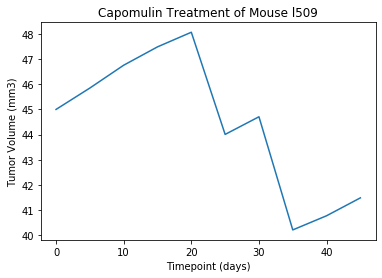

In [19]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
new_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
new_data.drop_duplicates(subset=["Mouse ID","Timepoint"], inplace=True)
capo_mouse_df = new_data.loc[(new_data["Mouse ID"] == "l509"), :]
tumor_vol = capo_mouse_df["Tumor Volume (mm3)"]
x_axis = capo_mouse_df["Timepoint"]
plt.plot(x_axis, tumor_vol)
plt.title("Capomulin Treatment of Mouse l509")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)")
plt.show()

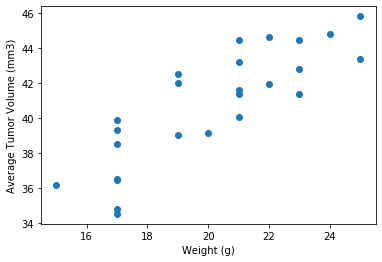

In [20]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capo_reg_df = new_data.loc[(new_data["Drug Regimen"] == "Capomulin"), :]
grouped_capo = capo_reg_df.groupby("Mouse ID")
weight = grouped_capo["Weight (g)"].unique()
avg_tumor_vol = grouped_capo["Tumor Volume (mm3)"].mean()

plt.scatter(weight, avg_tumor_vol)
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.show()

## Correlation and Regression

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr_df = pd.DataFrame(weight)
corr_df['Avg Tumor Vol'] = grouped_capo["Tumor Volume (mm3)"].mean()
corr_df["Weight (g)"] = corr_df["Weight (g)"].astype(int)
corr_df
weight = corr_df.loc[:,"Weight (g)"]
avg_tum_vol = corr_df.loc[:,"Avg Tumor Vol"]
print(f"The correlation coefficient between mouse weight and average tumor volume is {round(st.pearsonr(weight,avg_tum_vol)[0],2)}.")

The correlation coefficient between mouse weight and average tumor volume is 0.84.


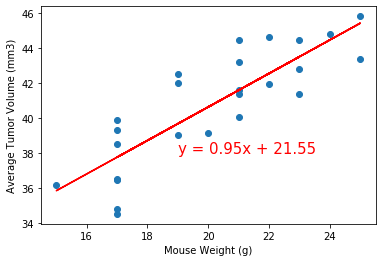

In [22]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, avg_tum_vol)
regress_values = weight * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(weight,avg_tum_vol)
plt.plot(weight, regress_values, "r-")
plt.annotate(line_eq,(19,38),fontsize=15,color="red")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()